In [87]:
import pandas as pd
import seaborn as sns
import numpy as np 
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

AD 450 Final 
Subject: US Chronic Disease Indicators

Technical Requirements Section

EDA

Summarize the data

Get basic statistics on the data

Get value counts of a categorical column

Get histograms of numeric columns

Look for relationships and patterns in the data

In [133]:
us_chronic_disease_indicators = pd.read_csv(r"final_data\U.S._Chronic_Disease_Indicators.csv")
print("Summarize the data: ")
print(us_chronic_disease_indicators.info())

Summarize the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  309215 non-null  int64  
 1   YearEnd                    309215 non-null  int64  
 2   LocationAbbr               309215 non-null  object 
 3   LocationDesc               309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              309215 non-null  object 
 9   DataValueType              309215 non-null  object 
 10  DataValue                  209196 non-null  float64
 11  DataValueAlt               209196 non-null  float64
 12  DataValueFootnoteSymbol    101716 non-null  object 
 13  DataValu

In [89]:
print("Get basic statistics on the data: ")
print(us_chronic_disease_indicators.describe())

Get basic statistics on the data: 
           YearStart        YearEnd  Response     DataValue  DataValueAlt  \
count  309215.000000  309215.000000       0.0  2.091960e+05  2.091960e+05   
mean     2020.012195    2020.288540       NaN  6.943569e+02  7.356701e+02   
std         1.530835       1.068591       NaN  1.620341e+04  1.834715e+04   
min      2015.000000    2019.000000       NaN  0.000000e+00  0.000000e+00   
25%      2019.000000    2019.000000       NaN  1.240000e+01  1.240000e+01   
50%      2020.000000    2020.000000       NaN  2.700000e+01  2.700000e+01   
75%      2021.000000    2021.000000       NaN  5.780000e+01  5.780000e+01   
max      2022.000000    2022.000000       NaN  2.925456e+06  2.925456e+06   

       LowConfidenceLimit  HighConfidenceLimit  StratificationCategory2  \
count       188885.000000        188890.000000                      0.0   
mean            36.825051            46.030554                      NaN   
std             65.025590            69.995643

In [90]:
print("Get value counts of a categorical column: ")
print(us_chronic_disease_indicators["Topic"].value_counts())  # Frequency of health topics

Get value counts of a categorical column: 
Topic
Cardiovascular Disease                             30709
Chronic Obstructive Pulmonary Disease              26951
Nutrition, Physical Activity, and Weight Status    26069
Health Status                                      25612
Alcohol                                            25321
Cancer                                             22358
Immunization                                       19140
Social Determinants of Health                      19026
Arthritis                                          18645
Diabetes                                           17318
Mental Health                                      16976
Tobacco                                            15931
Oral Health                                        13236
Asthma                                             10511
Cognitive Health and Caregiving                     9904
Sleep                                               5318
Disability                             

Get histograms for numeric columns: 


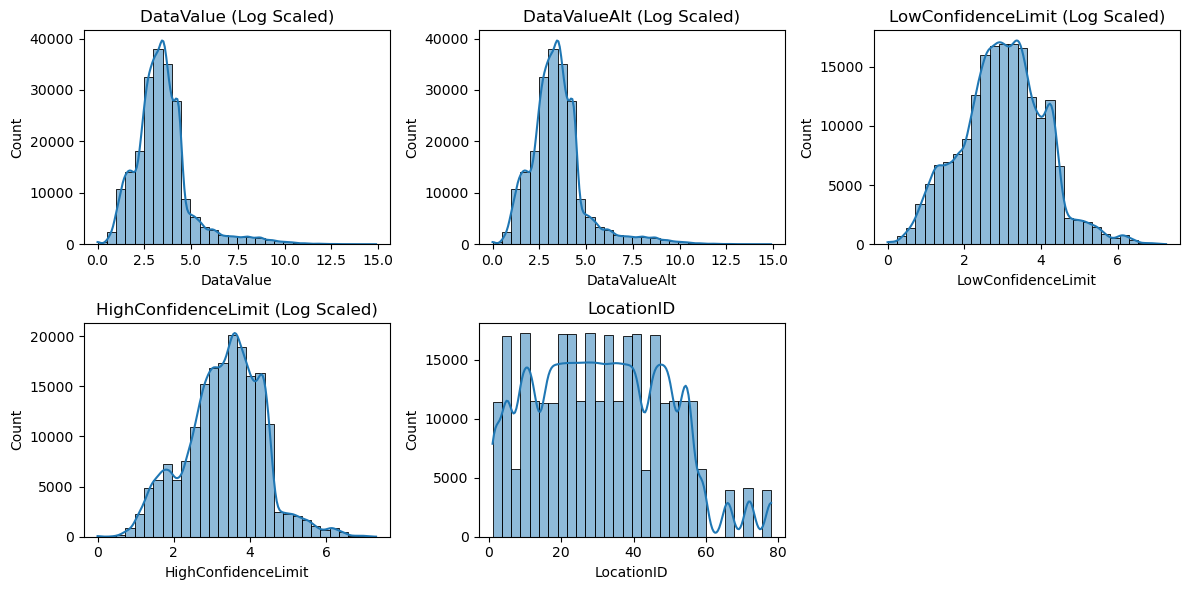

In [91]:
print("Get histograms for numeric columns: ")

# Select numeric columns
numeric_cols = us_chronic_disease_indicators.select_dtypes(include=["int64", "float64"]).columns

# Drop columns with too few unique values
filtered_cols = [col for col in numeric_cols if us_chronic_disease_indicators[col].nunique() > 10]  

num_cols = len(filtered_cols)
num_rows = math.ceil(num_cols / 3)  
plt.figure(figsize=(12, num_rows * 3))  

for i, col in enumerate(filtered_cols, 1):
    plt.subplot(num_rows, 3, i)  

    # Use a log-scale for very large sets
    if us_chronic_disease_indicators[col].max() > 1000:  
        transformed_data = np.log1p(us_chronic_disease_indicators[col].dropna())
        sns.histplot(transformed_data, bins=30, kde=True)
        plt.title(f"{col} (Log Scaled)")
    else:
        sns.histplot(us_chronic_disease_indicators[col].dropna(), bins=30, kde=True)
        plt.title(col)

plt.tight_layout()
plt.show()

Look for relationships and patterns in the data

Data Cleaning and Transformation

Filling NaN values

Correct data dtype issues

Removing outliers

Removing inaccurate data

Data transformations like normalization

Adding new derivative columns from existing columns

Data Visualization

Asking thoughtful analytical questions

Answering analytical questions with visuals

Modifying the graph to communicate findings

In [92]:
from sklearn.preprocessing import MinMaxScaler

# Drop rows where DataValue is missing
filtered_data = us_chronic_disease_indicators.dropna(subset=["DataValue"])

# Remove outliers using the Interquartile Range method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

filtered_data = remove_outliers(filtered_data, "DataValue")

# Separate data by DataValueUnit
percent_data = filtered_data[filtered_data["DataValueUnit"] == "%"]
count_data = filtered_data[filtered_data["DataValueUnit"] == "Number"]
rate_per_100k_data = filtered_data[filtered_data["DataValueUnit"] == "cases per 100,000"]
rate_per_1k_data = filtered_data[filtered_data["DataValueUnit"] == "cases per 1,000"]

# Normalize DataValue using Min-Max Scaling
scaler = MinMaxScaler()
filtered_data["DataValue"] = scaler.fit_transform(filtered_data[["DataValue"]])

# Print the number of rows in each category after filtering
print(f"Total rows after filtering: {filtered_data.shape[0]}")
print(f"Percentage-based rows: {percent_data.shape[0]}")
print(f"Raw count rows: {count_data.shape[0]}")
print(f"Rate per 100,000 rows: {rate_per_100k_data.shape[0]}")
print(f"Rate per 1,000 rows: {rate_per_1k_data.shape[0]}")

Total rows after filtering: 186658
Percentage-based rows: 135432
Raw count rows: 23574
Rate per 100,000 rows: 14552
Rate per 1,000 rows: 5941


For such a complex dataset, it's neccesary to do some data cleaning in order to make this information easier to interpret. 

Some fields are missing large amounts of data, making them not particularly useful. For example, Response and ResponseID are completely empty. These missing values need to be dropped. 

DataValueUnit consists of numerical data recorded across multiple measurement types:

Percentages

Raw counts

Rates per 100,000

Rates per 1000

This data needs to be separated across these categories to be considered useful. 

Additionally, this data has been collected from 55 locations, across 19 disease categories(Topics). 

Effectively cleaning the data to make it useful means removing empty data, and breaking down DataValueUnit by numerical type. 

Now we'll use the filtered data to consider the question:

How does geographic location relate to rates of cardiovascular disease?

This analysis will examine the percentage of adults with cardiovascular disease,
& the incidence rate per 100,000 for cardiovascular disease across all locations in the data. 

Data joining

Merging two or more dataframes on a column

Joining two or more dataframes on their index

Concatenate two or more dataframes. 

In [94]:
# Merge the two dataframes on 'LocationAbbr'
merged_data = pd.merge(cvd_data, smoking_data, on="LocationAbbr", suffixes=('_hd', '_smoking'))

print("Sample of merged data:")
print(merged_data.head())

print(f"Total rows after merging: {merged_data.shape[0]}")


Sample of merged data:
   YearStart_hd  YearEnd_hd LocationAbbr LocationDesc_hd DataSource_hd  \
0          2019        2019           AK          Alaska          NVSS   
1          2019        2019           AK          Alaska          NVSS   
2          2019        2019           AK          Alaska          NVSS   
3          2019        2019           AK          Alaska          NVSS   
4          2019        2019           AK          Alaska          NVSS   

                 Topic_hd                                        Question_hd  \
0  Cardiovascular Disease  Cerebrovascular disease (stroke) mortality amo...   
1  Cardiovascular Disease  Cerebrovascular disease (stroke) mortality amo...   
2  Cardiovascular Disease  Cerebrovascular disease (stroke) mortality amo...   
3  Cardiovascular Disease  Cerebrovascular disease (stroke) mortality amo...   
4  Cardiovascular Disease  Cerebrovascular disease (stroke) mortality amo...   

   Response_hd DataValueUnit_hd DataValueType_hd  .

In [95]:
# Join the two dataframes on their index
merged_data_on_index = cvd_data.join(smoking_data, lsuffix='_hd', rsuffix='_smoking')

print("Sample of merged data by index:")
print(merged_data_on_index.head())

print(f"Total rows after joining by index: {merged_data_on_index.shape[0]}")

Sample of merged data by index:
       YearStart_hd  YearEnd_hd LocationAbbr_hd LocationDesc_hd  \
14207          2019        2019              AK          Alaska   
14246          2019        2019              CA      California   
14249          2019        2019              AL         Alabama   
14251          2019        2019              CA      California   
14283          2019        2019              AZ         Arizona   

                DataSource_hd                Topic_hd  \
14207                    NVSS  Cardiovascular Disease   
14246                   BRFSS  Cardiovascular Disease   
14249  CMS Part A Claims Data  Cardiovascular Disease   
14251                   BRFSS  Cardiovascular Disease   
14283                    NVSS  Cardiovascular Disease   

                                             Question_hd  Response_hd  \
14207  Cerebrovascular disease (stroke) mortality amo...          NaN   
14246  Taking medicine to control high blood pressure...          NaN   
142

In [96]:
# Concatenate the two dataframes along the columns (axis=1)
concatenated_data = pd.concat([cvd_data, smoking_data], axis=1)

print("Sample of concatenated data:")
print(concatenated_data.head())

print(f"Total rows after concatenation: {concatenated_data.shape[0]}")

Sample of concatenated data:
       YearStart  YearEnd LocationAbbr LocationDesc              DataSource  \
14207     2019.0   2019.0           AK       Alaska                    NVSS   
14246     2019.0   2019.0           CA   California                   BRFSS   
14249     2019.0   2019.0           AL      Alabama  CMS Part A Claims Data   
14251     2019.0   2019.0           CA   California                   BRFSS   
14283     2019.0   2019.0           AZ      Arizona                    NVSS   

                        Topic  \
14207  Cardiovascular Disease   
14246  Cardiovascular Disease   
14249  Cardiovascular Disease   
14251  Cardiovascular Disease   
14283  Cardiovascular Disease   

                                                Question  Response  \
14207  Cerebrovascular disease (stroke) mortality amo...       NaN   
14246  Taking medicine to control high blood pressure...       NaN   
14249  Hospitalization for heart failure as principal...       NaN   
14251  Taking med

Aggregation and Grouping Operations

Perform an aggregation on all data

Perform an aggregation on a groupby

Create a pivot table or cross-tabulation table

In [97]:
# Aggregating heart disease data
aggregated_cvd_data = cvd_data.groupby(['LocationDesc', 'YearStart']).agg({
    'DataValue': ['mean', 'sum', 'count', 'std', 'min', 'max'],  
    'LowConfidenceLimit': ['mean', 'std', 'min', 'max'],  
    'HighConfidenceLimit': ['mean', 'std', 'min', 'max']
}).reset_index()

print("Aggregated heart disease data:")
print(aggregated_cvd_data.head())

print(f"Total rows after aggregation: {aggregated_cvd_data.shape[0]}")


Aggregated heart disease data:
  LocationDesc YearStart DataValue                                       \
                              mean        sum count       std       min   
0      Alabama      2019  0.396206  49.129530   124  0.198285  0.022250   
1      Alabama      2020  0.416292  22.896058    55  0.244682  0.027018   
2      Alabama      2021  0.393086  46.384139   118  0.201740  0.024634   
3       Alaska      2019  0.319939  37.752861   118  0.201218  0.057057   
4       Alaska      2020  0.366246  20.509774    56  0.274558  0.051176   

            LowConfidenceLimit                         HighConfidenceLimit  \
        max               mean        std   min    max                mean   
0  0.977432          44.796466  23.900068  2.20  118.3           55.585862   
1  0.924984          47.282128  28.668790  2.80  112.2           61.096596   
2  0.983789          45.032545  24.968340  2.50  120.0           55.723273   
3  0.973458          33.080280  22.395344  5.67  112.

In [98]:
# Grouping the heart disease data by 'LocationDesc' and 'YearStart'
aggregated_cvd_data = cvd_data.groupby(['LocationDesc', 'YearStart']).agg({
    'DataValue': ['mean', 'sum', 'count', 'std', 'min', 'max'],  # Aggregating 'DataValue'
    'LowConfidenceLimit': ['mean', 'std', 'min', 'max'],  # Aggregating 'LowConfidenceLimit'
    'HighConfidenceLimit': ['mean', 'std', 'min', 'max']  # Aggregating 'HighConfidenceLimit'
}).reset_index()

print("Aggregated heart disease data:")
print(aggregated_cvd_data.head())

print(f"Total rows after aggregation: {aggregated_cvd_data.shape[0]}")


Aggregated heart disease data:
  LocationDesc YearStart DataValue                                       \
                              mean        sum count       std       min   
0      Alabama      2019  0.396206  49.129530   124  0.198285  0.022250   
1      Alabama      2020  0.416292  22.896058    55  0.244682  0.027018   
2      Alabama      2021  0.393086  46.384139   118  0.201740  0.024634   
3       Alaska      2019  0.319939  37.752861   118  0.201218  0.057057   
4       Alaska      2020  0.366246  20.509774    56  0.274558  0.051176   

            LowConfidenceLimit                         HighConfidenceLimit  \
        max               mean        std   min    max                mean   
0  0.977432          44.796466  23.900068  2.20  118.3           55.585862   
1  0.924984          47.282128  28.668790  2.80  112.2           61.096596   
2  0.983789          45.032545  24.968340  2.50  120.0           55.723273   
3  0.973458          33.080280  22.395344  5.67  112.

In [99]:
# Create a pivot table with 'LocationDesc' and 'YearStart' as the index
pivot_table_cvd = pd.pivot_table(cvd_data, 
                                 values='DataValue', 
                                 index=['LocationDesc', 'YearStart'], 
                                 aggfunc={'DataValue': ['mean', 'sum', 'count', 'std', 'min', 'max']})

print("Pivot Table for heart disease data:")
print(pivot_table_cvd.head())

Pivot Table for heart disease data:
                        count       max      mean       min       std  \
LocationDesc YearStart                                                  
Alabama      2019         124  0.977432  0.396206  0.022250  0.198285   
             2020          55  0.924984  0.416292  0.027018  0.244682   
             2021         118  0.983789  0.393086  0.024634  0.201740   
Alaska       2019         118  0.973458  0.319939  0.057057  0.201218   
             2020          56  0.994120  0.366246  0.051176  0.274558   

                              sum  
LocationDesc YearStart             
Alabama      2019       49.129530  
             2020       22.896058  
             2021       46.384139  
Alaska       2019       37.752861  
             2020       20.509774  


Presentation Section

Understanding the Data: US Chronic Disease Indicators

CDC's Division of Population Health provides a cross-cutting set of 115 indicators developed by consensus among CDC, the Council of State and Territorial Epidemiologists, and the National Association of Chronic Disease Directors.

RangeIndex: 309215 entries, 0 to 309214
Data columns (total 34 columns):

These indicators allow states and territories to uniformly define, collect, and report chronic disease data that are important to public health practice in their area. 

In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources.

In [100]:
print("Unique Questions:")
print(us_chronic_disease_indicators["Question"].unique())

Unique Questions:
['Diabetes among adults' 'Short sleep duration among high school students'
 'Asthma mortality among all people, underlying cause'
 'Current asthma among adults'
 'Diabetes mortality among all people, underlying or contributing cause'
 'Recent activity limitation among adults' 'Depression among adults'
 'Alcohol use among high school students' 'Life expectancy at birth'
 'Severe joint pain among adults with arthritis'
 'Current cigarette smoking among adults' 'Arthritis among adults'
 'Adults with any disability' 'Binge drinking prevalence among adults'
 'Physical inactivity among adults with arthritis'
 'Influenza vaccination among adults'
 'Binge drinking intensity among adults who binge drink'
 'Chronic liver disease mortality among all people, underlying cause'
 '2 or more chronic conditions among adults'
 'No teeth lost among adults aged 18-64 years'
 'Short sleep duration among adults'
 'Fair or poor self-rated health status among adults'
 'All teeth lost among a

In [101]:
print("\nUnique Topics:")
print(us_chronic_disease_indicators["Topic"].unique())


Unique Topics:
['Diabetes' 'Sleep' 'Asthma' 'Health Status' 'Mental Health' 'Alcohol'
 'Arthritis' 'Tobacco' 'Disability' 'Immunization' 'Oral Health'
 'Nutrition, Physical Activity, and Weight Status' 'Cancer'
 'Cardiovascular Disease' 'Chronic Obstructive Pulmonary Disease'
 'Cognitive Health and Caregiving' 'Social Determinants of Health'
 'Maternal Health' 'Chronic Kidney Disease']


How does geographic location relate to rates of cardiovascular disease?

This analysis will examine the percentage of adults with cardiovascular disease,
& the incidence rate per 100,000 for cardiovascular disease across all locations in the data. 

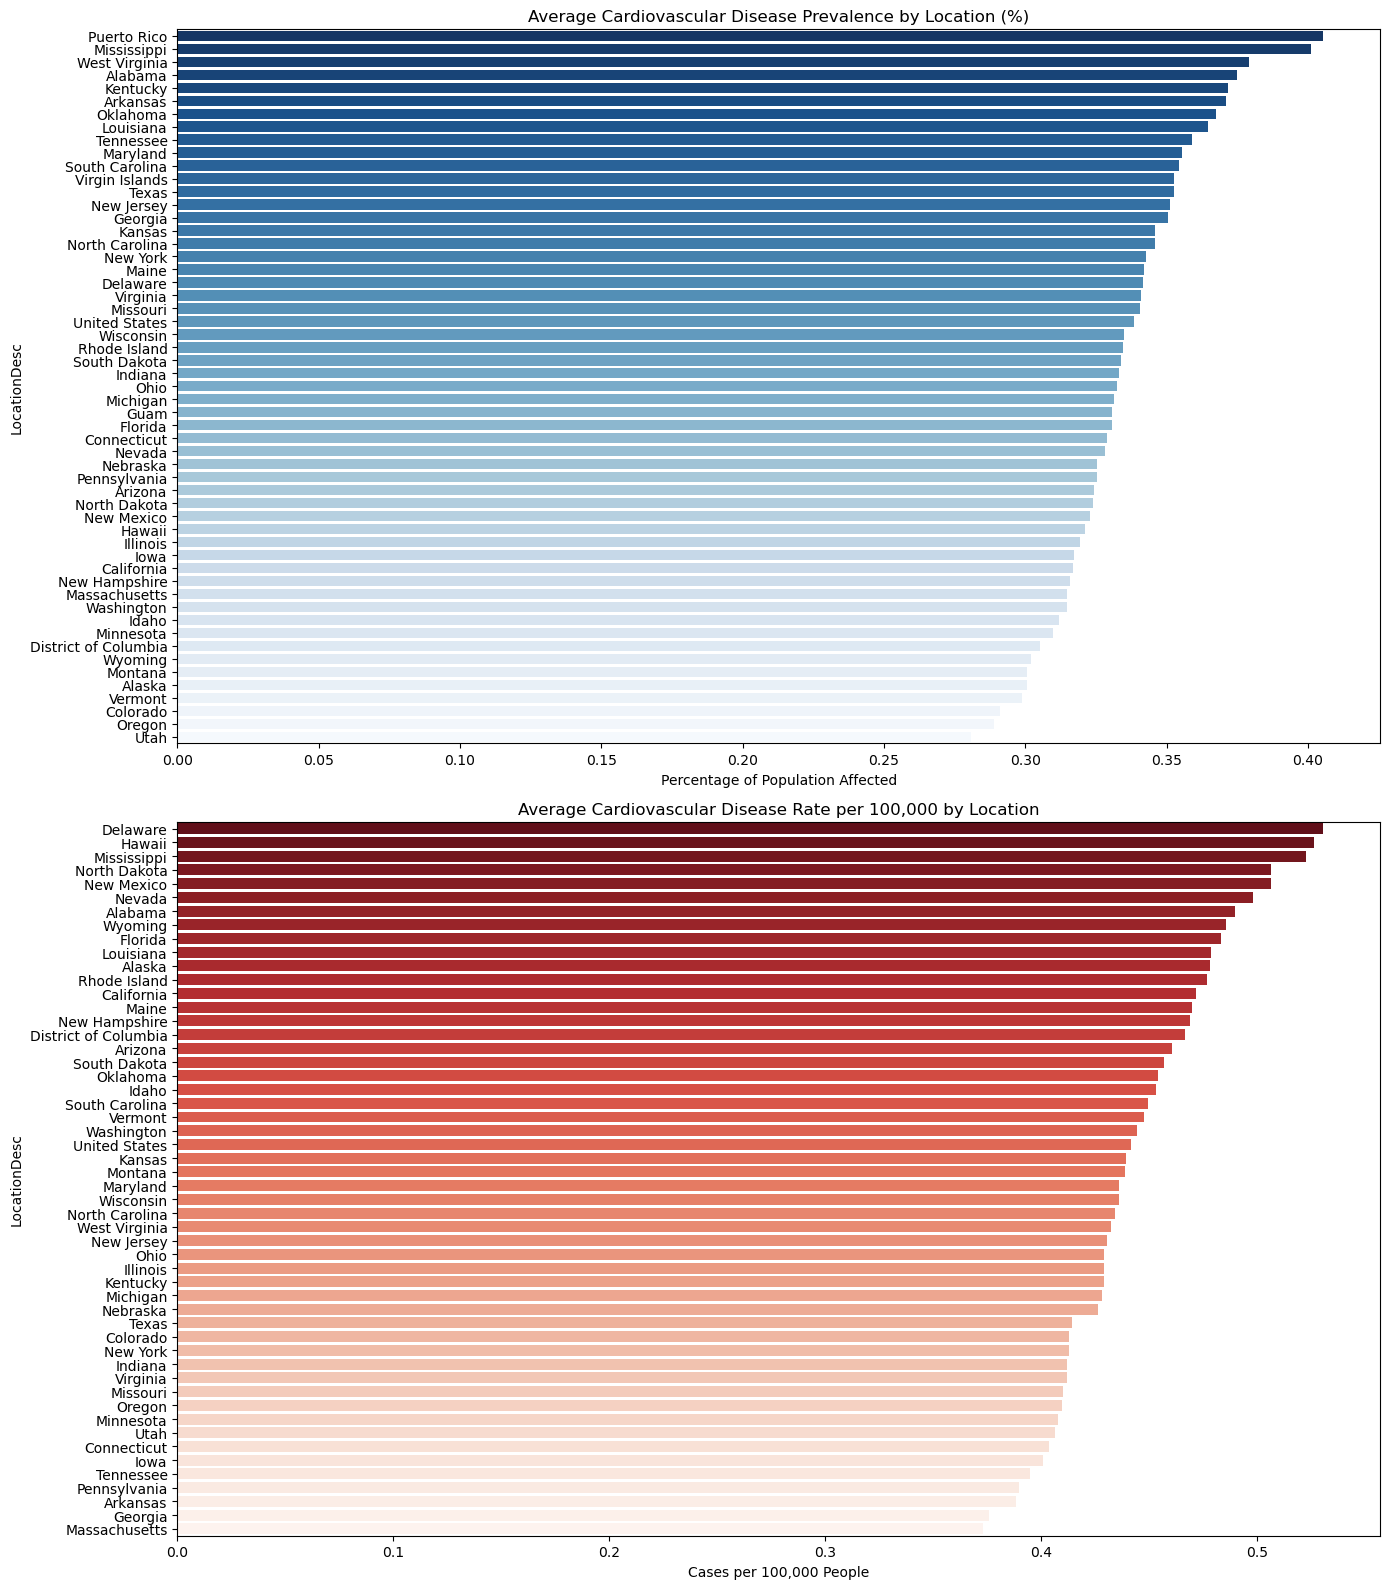

In [102]:
cvd_data = filtered_data[filtered_data["Topic"] == "Cardiovascular Disease"]

# Separate by measurement type
cvd_percent = cvd_data[cvd_data["DataValueUnit"] == "%"]
cvd_rate_per_100k = cvd_data[cvd_data["DataValueUnit"] == "cases per 100,000"]

# Group by Location & Calculate Average Values
cvd_percent_by_location = cvd_percent.groupby("LocationDesc")["DataValue"].mean().sort_values(ascending=False)
cvd_rate_by_location = cvd_rate_per_100k.groupby("LocationDesc")["DataValue"].mean().sort_values(ascending=False)

# Plotting the Data
fig, axes = plt.subplots(2, 1, figsize=(14, 16))
plt.subplots_adjust(hspace=0.4) 


# Percentages Plot
sns.barplot(
    x=cvd_percent_by_location.values, 
    y=cvd_percent_by_location.index, 
    hue=cvd_percent_by_location.index, 
    ax=axes[0], 
    palette="Blues_r", 
    legend=False  
)
axes[0].set_title("Average Cardiovascular Disease Prevalence by Location (%)")
axes[0].set_xlabel("Percentage of Population Affected")

# Rates per 100,000 Plot
sns.barplot(
    x=cvd_rate_by_location.values, 
    y=cvd_rate_by_location.index, 
    hue=cvd_rate_by_location.index,  
    ax=axes[1], 
    palette="Reds_r", 
    legend=False  
)
axes[1].set_title("Average Cardiovascular Disease Rate per 100,000 by Location")
axes[1].set_xlabel("Cases per 100,000 People")

plt.tight_layout()
plt.show()

One of the questions in the data is: "Current cigarette smoking among adults"

Which leads me to the question:

How does the percentage of smokers in the population by location compare witht the incidence of heart disease? 

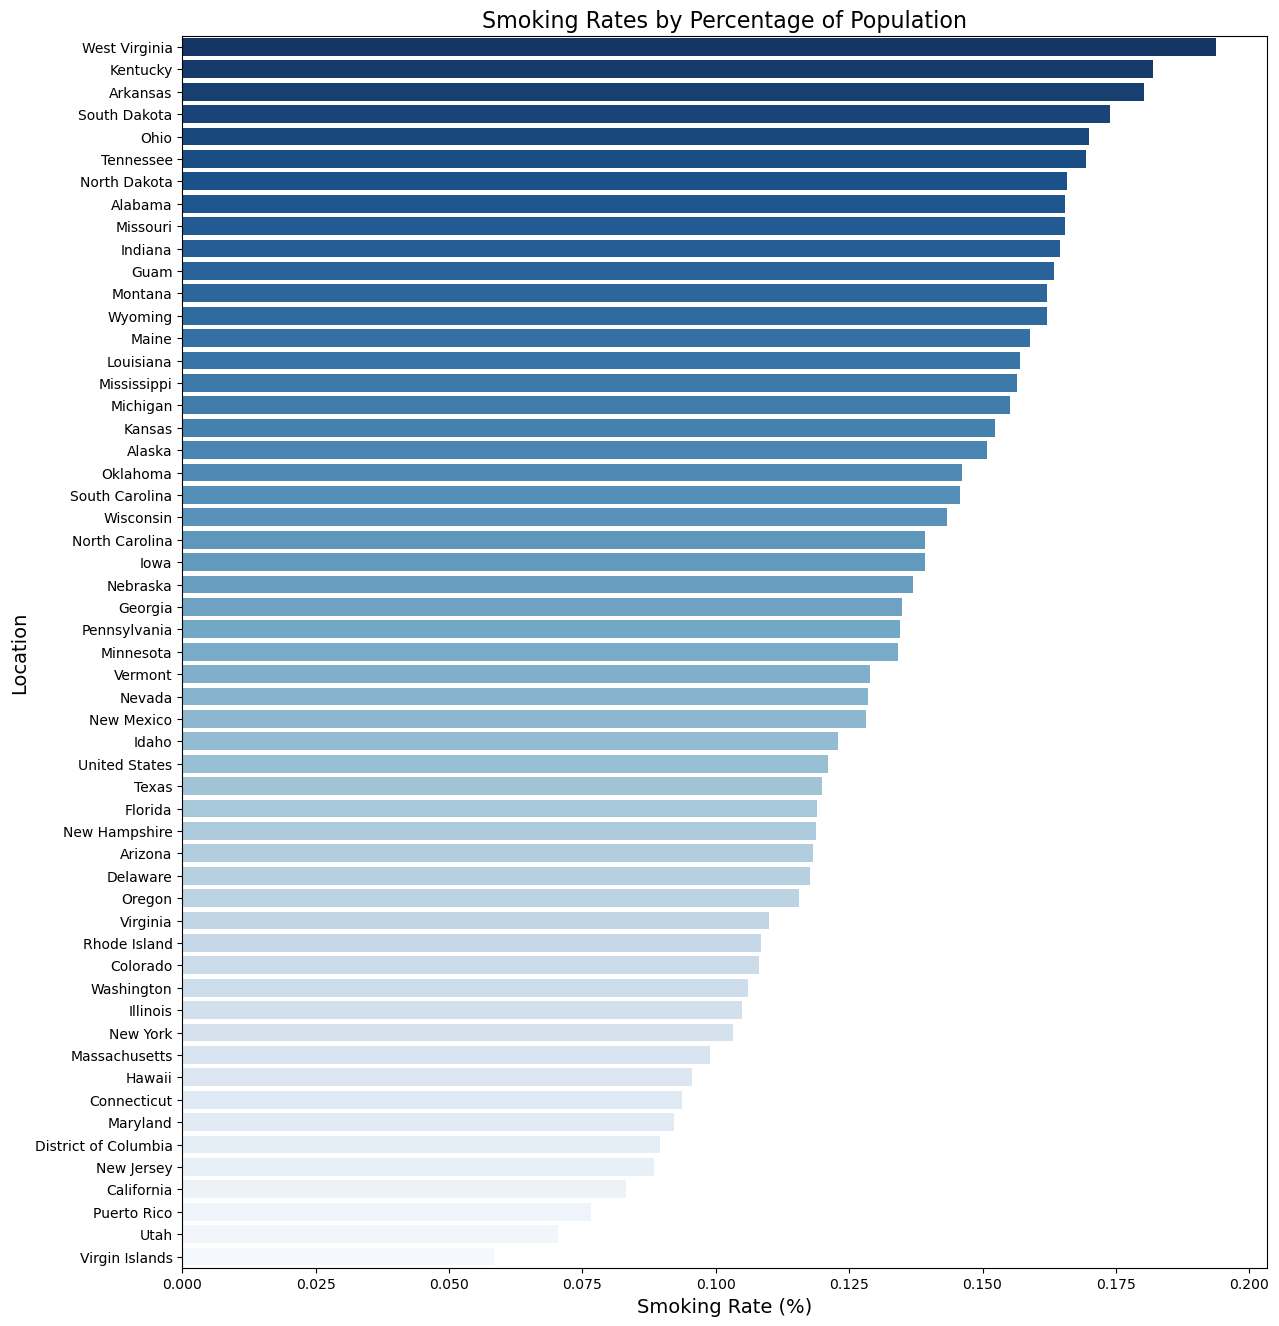

In [103]:
# Filter data for the specific question
smoking_data = filtered_data[filtered_data["Question"] == "Current cigarette smoking among adults"]

# Aggregate smoking data by location (percentage-based only)
smoking_percent_by_location = smoking_data[smoking_data["DataValueUnit"] == "%"].groupby("LocationDesc")["DataValue"].mean().sort_values(ascending=False)

# Plotting the data
fig, ax = plt.subplots(figsize=(14, 16))
plt.subplots_adjust(hspace=0.4)

# Plot percentage-based smoking rates with updated logic for 'hue' and 'legend'
sns.barplot(x=smoking_percent_by_location.values, y=smoking_percent_by_location.index, ax=ax, palette="Blues_r", hue=smoking_percent_by_location.index)
ax.set_title("Smoking Rates by Percentage of Population", fontsize=16)
ax.set_xlabel("Smoking Rate (%)", fontsize=14)
ax.set_ylabel("Location", fontsize=14)

# Show plot
plt.show()

How does demographic information relate to the underlying cause of cardiovascualr disease mortality?

In [131]:
# Step 1: Filter the data for the specific question
cvd_mortality = filtered_data[filtered_data['Question'] == 'Coronary heart disease mortality among all people, underlying cause']

underlying_causes_data = {}
for cause in ['Race/Ethnicity', 'Age', 'Sex', 'Overall']:
    cause_data = cvd_mortality[cvd_mortality['StratificationCategory1'] == cause]
    underlying_causes_data[cause] = cause_data

for cause, data in underlying_causes_data.items():
    print(f"Data for '{cause}':")
    print(data[['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Stratification1', 'DataValue']].head(), "\n")


Data for 'Race/Ethnicity':
       YearStart  YearEnd LocationAbbr LocationDesc  \
14702       2019     2019           AZ      Arizona   
14890       2019     2019           CA   California   
15308       2019     2019           AZ      Arizona   
15521       2019     2019           AL      Alabama   
15746       2019     2019           CA   California   

                 Stratification1  DataValue  
14702        Asian, non-Hispanic   0.842339  
14890        White, non-Hispanic   0.704863  
15308  Multiracial, non-Hispanic   0.599968  
15521                   Hispanic   0.174825  
15746        Asian, non-Hispanic   0.519708   

Data for 'Age':
       YearStart  YearEnd LocationAbbr LocationDesc Stratification1  DataValue
14902       2019     2019           CA   California        Age 0-44   0.015099
15409       2019     2019           AL      Alabama        Age 0-44   0.977432
16510       2019     2019           AK       Alaska       Age 45-64   0.574539
16813       2019     2019       